In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

# Linear Algebra with Numpy

In [3]:
a=np.array([1,3,2,4])
a


array([1, 3, 2, 4])

In [4]:
type(a)

numpy.ndarray

In [7]:
A = np.array([[3,1,2],
          [2,3,4]])

B = np.array([[0,1],
             [2,3],
             [4,5]])

C = np.array([[0,1],
          [2,3],
          [4,5],
          [0,1],
          [2,3],
          [4,5]])

print("A is a {} matrix".format(A.shape))
print("B is a {} matrix".format(B.shape))
print("C is a {} matrix".format(C.shape))
      

A is a (2, 3) matrix
B is a (3, 2) matrix
C is a (6, 2) matrix


In [8]:
A[0]

array([3, 1, 2])

In [9]:
C[2, 0]

4

In [10]:
B[:,0]

array([0, 2, 4])

In [11]:
3 * A

array([[ 9,  3,  6],
       [ 6,  9, 12]])

In [12]:
A + A

array([[6, 2, 4],
       [4, 6, 8]])

In [13]:
A * A

array([[ 9,  1,  4],
       [ 4,  9, 16]])

In [14]:
A / A

array([[1., 1., 1.],
       [1., 1., 1.]])

In [15]:
A - A

array([[0, 0, 0],
       [0, 0, 0]])

In [16]:
A.dot(B)

array([[10, 16],
       [22, 31]])

In [17]:
np.dot(A,B)

array([[10, 16],
       [22, 31]])

In [18]:
B.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

In [19]:
C.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28],
       [ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

# Gradient Descent

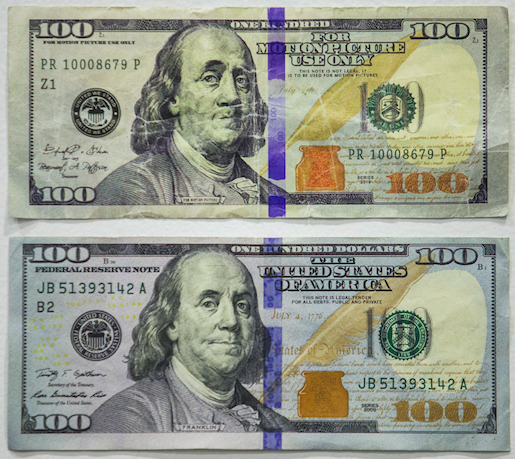

In [22]:
from PIL import Image
img = Image.open("C:/Users/aloke/Downloads/banknotes.png")
img

In [20]:
df = pd.read_csv("C:/Users/aloke/Downloads/banknotes.csv")

In [23]:
df.head()

variace  skewness  curtosis  entropy  class
0  3.62160    8.6661   -2.8073 -0.44699      0
1  4.54590    8.1674   -2.4586 -1.46210      0
2  3.86600   -2.6383    1.9242  0.10645      0
3  3.45660    9.5228   -4.0112 -3.59440      0
4  0.32924   -4.4552    4.5718 -0.98880      0

In [24]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [25]:
import seaborn as sns

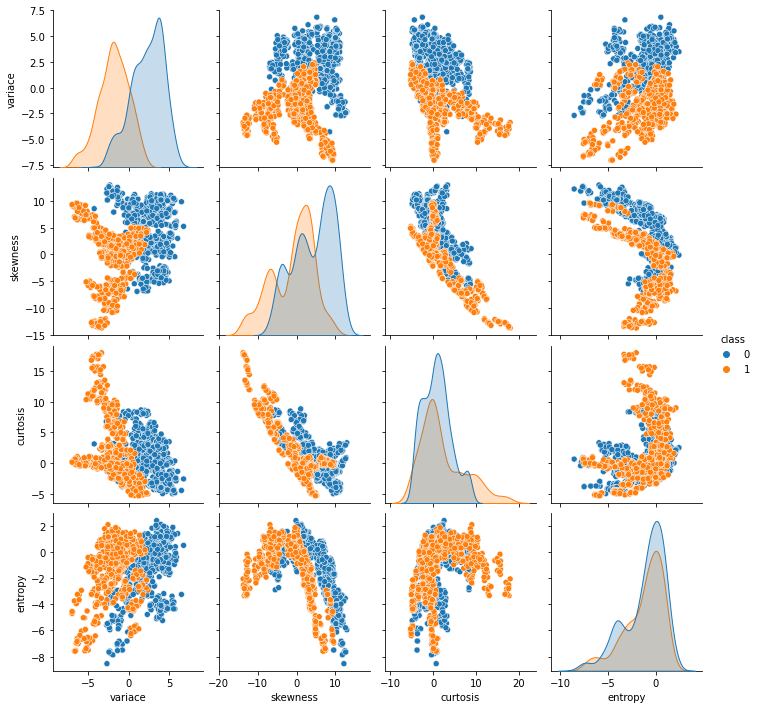

In [27]:
sns.pairplot(df, hue="class")

# Baseline model

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [29]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [30]:
model = RandomForestClassifier()
cross_val_score(model, X, y)

array([0.99272727, 0.99272727, 0.98905109, 0.99635036, 0.99635036])

# Logistic Regression Model

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [33]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

In [45]:
model = Sequential()
model.add(Dense(1, input_shape=(4,), activation = 'sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10)
result = model.evaluate(X_test, y_test)

Epoch 1/10
30/30 [==============================] - 0s 345us/step - loss: 0.6845 - accuracy: 0.6198
Epoch 2/10
30/30 [==============================] - 0s 345us/step - loss: 0.6579 - accuracy: 0.6490
Epoch 3/10
30/30 [==============================] - 0s 414us/step - loss: 0.6348 - accuracy: 0.6615
Epoch 4/10
30/30 [==============================] - 0s 379us/step - loss: 0.6144 - accuracy: 0.6771
Epoch 5/10
30/30 [==============================] - 0s 379us/step - loss: 0.5961 - accuracy: 0.6906
Epoch 6/10
30/30 [==============================] - 0s 414us/step - loss: 0.5796 - accuracy: 0.6958
Epoch 7/10
30/30 [==============================] - 0s 414us/step - loss: 0.5645 - accuracy: 0.7010
Epoch 8/10
30/30 [==============================] - 0s 377us/step - loss: 0.5506 - accuracy: 0.7104
Epoch 9/10
30/30 [==============================] - 0s 374us/step - loss: 0.5377 - accuracy: 0.7156
Epoch 10/10
13/13 [==============================] - 0s 416us/step - loss: 0.5421 - accuracy: 0.7233

In [46]:
historydf = pd.DataFrame(history.history, index=history.epoch)

Text(0.5, 1.0, 'Test accuracy: 54.2 %')

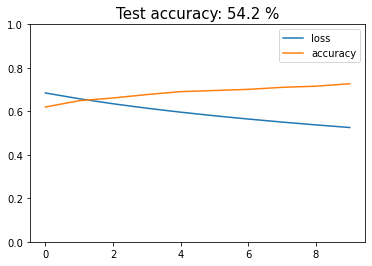

In [47]:
historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[0]*100), fontsize=15)

# Learning Rates

In [55]:
dflist = []

lr = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:
    
    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation = 'sigmoid'))

    model.compile(loss='binary_crossentropy',
             optimizer=SGD(lr=lr),
             metrics=['accuracy'])
    h = model.fit(X_train, y_train, epochs = 10, batch_size=16, verbose=0)
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [56]:
historydf = pd.concat(dflist, axis =1)
historydf

loss  accuracy      loss  accuracy      loss  accuracy      loss  \
0  0.586693  0.707292  0.424549  0.865625  0.584686  0.689583  0.265702   
1  0.548248  0.750000  0.316858  0.919792  0.358298  0.844792  0.123479   
2  0.516623  0.772917  0.270115  0.929167  0.270963  0.908333  0.094401   
3  0.489854  0.786458  0.239630  0.930208  0.219345  0.938542  0.079488   
4  0.466787  0.803125  0.217100  0.941667  0.186197  0.959375  0.071241   
5  0.446494  0.822917  0.199285  0.941667  0.162995  0.961458  0.065087   
6  0.428486  0.833333  0.184747  0.948958  0.146134  0.964583  0.060786   
7  0.412186  0.837500  0.172527  0.956250  0.133269  0.968750  0.057383   
8  0.397365  0.845833  0.162314  0.956250  0.123171  0.968750  0.054750   
9  0.383764  0.854167  0.153418  0.959375  0.114982  0.969792  0.052478   

   accuracy  
0  0.907292  
1  0.966667  
2  0.972917  
3  0.975000  
4  0.977083  
5  0.979167  
6  0.980208  
7  0.981250  
8  0.981250  
9  0.981250

In [61]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported], 
                                 names=['learning_rate', 'metric'])

historydf.columns = idx

In [62]:
historydf

learning_rate      0.01                0.05                0.10            \
metric             loss  accuracy      loss  accuracy      loss  accuracy   
0              0.586693  0.707292  0.424549  0.865625  0.584686  0.689583   
1              0.548248  0.750000  0.316858  0.919792  0.358298  0.844792   
2              0.516623  0.772917  0.270115  0.929167  0.270963  0.908333   
3              0.489854  0.786458  0.239630  0.930208  0.219345  0.938542   
4              0.466787  0.803125  0.217100  0.941667  0.186197  0.959375   
5              0.446494  0.822917  0.199285  0.941667  0.162995  0.961458   
6              0.428486  0.833333  0.184747  0.948958  0.146134  0.964583   
7              0.412186  0.837500  0.172527  0.956250  0.133269  0.968750   
8              0.397365  0.845833  0.162314  0.956250  0.123171  0.968750   
9              0.383764  0.854167  0.153418  0.959375  0.114982  0.969792   

learning_rate      0.50            
metric             loss  accuracy  
0              0.265702  0.907292  
1              0.123479  0.966667  
2              0.094401  0.972917  
3              0.079488  0.975000  
4              0.071241  0.977083  
5              0.065087  0.979167  
6              0.060786  0.980208  
7              0.057383  0.981250  
8              0.054750  0.981250  
9              0.052478  0.981250

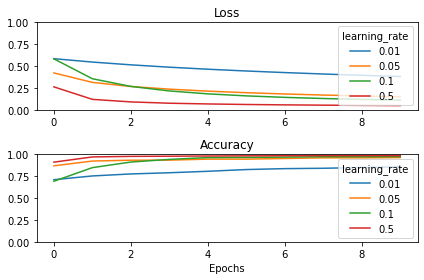

In [64]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level = 'metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level = 'metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

# Batch Sizes

In [74]:
dflist = []

batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    
    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation = 'sigmoid'))

    model.compile(loss='binary_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])
    h = model.fit(X_train, y_train, epochs = 10, batch_size=batch_size, verbose=0)
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [75]:
historydf = pd.concat(dflist, axis =1)
historydf

loss  accuracy      loss  accuracy      loss  accuracy      loss  \
0  0.716486  0.585417  0.901208  0.421875  0.755426  0.530208  0.942290   
1  0.637367  0.661458  0.801481  0.463542  0.731961  0.539583  0.925832   
2  0.581920  0.713542  0.722638  0.525000  0.709828  0.550000  0.909783   
3  0.540796  0.735417  0.660728  0.595833  0.689041  0.564583  0.894149   
4  0.508719  0.753125  0.611766  0.652083  0.669573  0.582292  0.879054   
5  0.482468  0.766667  0.572469  0.717708  0.651308  0.595833  0.864502   
6  0.460195  0.779167  0.540411  0.780208  0.634202  0.607292  0.850064   
7  0.440806  0.789583  0.513688  0.810417  0.618161  0.621875  0.835926   
8  0.423506  0.804167  0.491100  0.832292  0.603156  0.637500  0.822144   
9  0.407841  0.813542  0.471660  0.842708  0.589095  0.655208  0.808802   

   accuracy  
0  0.456250  
1  0.458333  
2  0.463542  
3  0.470833  
4  0.473958  
5  0.475000  
6  0.477083  
7  0.481250  
8  0.482292  
9  0.482292

In [76]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported], 
                                 names=['batch_size', 'metric'])

historydf.columns = idx

In [77]:
historydf

batch_size       16                  32                  64             \
metric          loss  accuracy      loss  accuracy      loss  accuracy   
0           0.716486  0.585417  0.901208  0.421875  0.755426  0.530208   
1           0.637367  0.661458  0.801481  0.463542  0.731961  0.539583   
2           0.581920  0.713542  0.722638  0.525000  0.709828  0.550000   
3           0.540796  0.735417  0.660728  0.595833  0.689041  0.564583   
4           0.508719  0.753125  0.611766  0.652083  0.669573  0.582292   
5           0.482468  0.766667  0.572469  0.717708  0.651308  0.595833   
6           0.460195  0.779167  0.540411  0.780208  0.634202  0.607292   
7           0.440806  0.789583  0.513688  0.810417  0.618161  0.621875   
8           0.423506  0.804167  0.491100  0.832292  0.603156  0.637500   
9           0.407841  0.813542  0.471660  0.842708  0.589095  0.655208   

batch_size       128            
metric          loss  accuracy  
0           0.942290  0.456250  
1           0.925832  0.458333  
2           0.909783  0.463542  
3           0.894149  0.470833  
4           0.879054  0.473958  
5           0.864502  0.475000  
6           0.850064  0.477083  
7           0.835926  0.481250  
8           0.822144  0.482292  
9           0.808802  0.482292

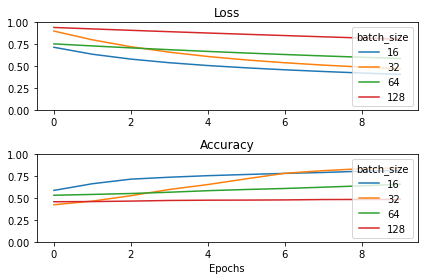

In [78]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level = 'metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level = 'metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

# Optimizers

In [132]:
dflist = []
import tensorflow as tf
optimizers = ['SGD(lr=0.01)', 'SGD(lr=0.01, momentum=0.3)', 'SGD(lr=0.01, momentum=0.3, nesterov=True)',  'tf.keras.optimizers.Adam(learning_rate=0.01)', ' tf.keras.optimizers.Adagrad(learning_rate=0.01)', 'tf.keras.optimizers.RMSprop(learning_rate=0.01)'  ]

for opt_name in optimizers:
    
    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation = 'sigmoid'))

    model.compile(loss='binary_crossentropy',
             optimizer=eval(opt_name),
             metrics=['accuracy'])
    h = model.fit(X_train, y_train, epochs = 20, batch_size=16, verbose=0)
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

C:\Users\aloke\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [133]:
historydf = pd.concat(dflist, axis =1)
historydf

loss  accuracy      loss  accuracy      loss  accuracy      loss  \
0   0.677992  0.583333  0.774759  0.485417  0.580391  0.704167  0.417972   
1   0.613318  0.671875  0.594005  0.645833  0.522692  0.753125  0.303611   
2   0.567357  0.700000  0.486680  0.854167  0.480038  0.779167  0.234672   
3   0.532259  0.721875  0.420305  0.915625  0.446782  0.800000  0.190330   
4   0.503975  0.754167  0.376341  0.927083  0.419641  0.812500  0.160088   
5   0.480082  0.771875  0.345205  0.925000  0.396698  0.819792  0.139092   
6   0.459333  0.783333  0.321677  0.927083  0.376892  0.831250  0.123618   
7   0.440904  0.798958  0.303076  0.932292  0.359373  0.841667  0.111603   
8   0.424247  0.810417  0.287798  0.932292  0.343664  0.859375  0.102196   
9   0.409070  0.822917  0.274901  0.933333  0.329413  0.875000  0.094684   
10  0.395042  0.834375  0.263698  0.933333  0.316397  0.883333  0.088500   
11  0.382098  0.843750  0.253882  0.935417  0.304447  0.888542  0.083224   
12  0.370025  0.854167  0.245062  0.937500  0.293410  0.895833  0.078890   
13  0.358706  0.857292  0.237092  0.937500  0.283169  0.906250  0.074993   
14  0.348081  0.863542  0.229868  0.941667  0.273680  0.912500  0.071611   
15  0.338105  0.869792  0.223214  0.943750  0.264846  0.920833  0.068845   
16  0.328658  0.877083  0.217064  0.947917  0.256590  0.922917  0.066246   
17  0.319776  0.883333  0.211366  0.951042  0.248855  0.921875  0.063940   
18  0.311344  0.887500  0.206035  0.952083  0.241632  0.923958  0.061949   
19  0.303331  0.894792  0.201050  0.953125  0.234822  0.926042  0.060018   

    accuracy      loss  accuracy      loss  accuracy  
0   0.813542  0.846505  0.498958  0.948222  0.201042  
1   0.881250  0.771544  0.525000  0.623459  0.659375  
2   0.931250  0.726575  0.555208  0.438575  0.819792  
3   0.950000  0.692595  0.572917  0.315736  0.909375  
4   0.960417  0.665024  0.602083  0.234066  0.948958  
5   0.964583  0.641713  0.623958  0.180711  0.953125  
6   0.968750  0.621488  0.654167  0.145675  0.961458  
7   0.969792  0.603618  0.684375  0.121019  0.967708  
8   0.970833  0.587603  0.713542  0.104406  0.969792  
9   0.973958  0.573158  0.737500  0.092388  0.970833  
10  0.972917  0.560016  0.760417  0.083210  0.973958  
11  0.975000  0.547975  0.779167  0.076546  0.973958  
12  0.975000  0.536886  0.794792  0.070403  0.975000  
13  0.977083  0.526622  0.809375  0.065873  0.976042  
14  0.977083  0.517084  0.837500  0.062295  0.980208  
15  0.979167  0.508204  0.853125  0.059493  0.980208  
16  0.980208  0.499883  0.863542  0.056746  0.979167  
17  0.980208  0.492087  0.869792  0.054663  0.980208  
18  0.980208  0.484756  0.879167  0.052851  0.980208  
19  0.980208  0.477848  0.888542  0.051281  0.980208

In [134]:
metrics_reported = dflist[0].columns


In [135]:
metrics_reported

Index(['loss', 'accuracy'], dtype='object')

In [136]:
idx = pd.MultiIndex.from_product([optimizers, metrics_reported], 
                                 names=['optimizers', 'metric'])



In [137]:
idx

MultiIndex([(                                    'SGD(lr=0.01)',     'loss'),
            (                                    'SGD(lr=0.01)', 'accuracy'),
            (                      'SGD(lr=0.01, momentum=0.3)',     'loss'),
            (                      'SGD(lr=0.01, momentum=0.3)', 'accuracy'),
            (       'SGD(lr=0.01, momentum=0.3, nesterov=True)',     'loss'),
            (       'SGD(lr=0.01, momentum=0.3, nesterov=True)', 'accuracy'),
            (    'tf.keras.optimizers.Adam(learning_rate=0.01)',     'loss'),
            (    'tf.keras.optimizers.Adam(learning_rate=0.01)', 'accuracy'),
            (' tf.keras.optimizers.Adagrad(learning_rate=0.01)',     'loss'),
            (' tf.keras.optimizers.Adagrad(learning_rate=0.01)', 'accuracy'),
            ( 'tf.keras.optimizers.RMSprop(learning_rate=0.01)',     'loss'),
            ( 'tf.keras.optimizers.RMSprop(learning_rate=0.01)', 'accuracy')],
           names=['optimizers', 'metric'])

In [138]:
historydf.columns = idx

Text(0.5, 1.0, 'Loss')

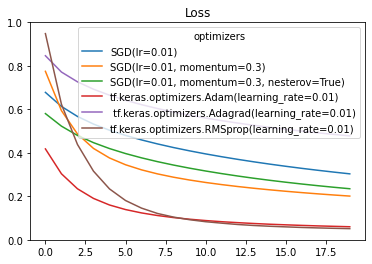

In [139]:
historydf.xs('loss', axis=1, level = 'metric').plot(ylim=(0,1))
plt.title("Loss")




Text(0.5, 0, 'Epochs')

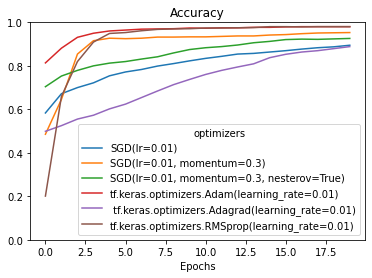

In [140]:
historydf.xs('accuracy', axis=1, level = 'metric').plot(ylim=(0,1))
plt.title("Accuracy")
plt.xlabel("Epochs")


# Initialization

In [127]:
dflist = []
import tensorflow as tf
initializers = ['zeros', 'uniform', 'normal', 'he_normal', 'lecun_uniform']

for init in initializers:
    
    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), kernel_initializer=init, activation = 'sigmoid'))

    model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])
    h = model.fit(X_train, y_train, epochs = 20, batch_size=16, verbose=0)
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [128]:
historydf = pd.concat(dflist, axis =1)
historydf

loss  accuracy      loss  accuracy      loss  accuracy      loss  \
0   0.669974  0.770833  0.664351  0.747917  0.637777  0.887500  0.718118   
1   0.636674  0.796875  0.630779  0.777083  0.604973  0.885417  0.685183   
2   0.607533  0.809375  0.601365  0.795833  0.575809  0.875000  0.654234   
3   0.580585  0.817708  0.574762  0.812500  0.550386  0.865625  0.625494   
4   0.555722  0.826042  0.550570  0.825000  0.527046  0.859375  0.597316   
5   0.533015  0.836458  0.528055  0.831250  0.505286  0.863542  0.571231   
6   0.511979  0.840625  0.507273  0.841667  0.485142  0.866667  0.545375   
7   0.492311  0.850000  0.487743  0.855208  0.466530  0.868750  0.521978   
8   0.473321  0.858333  0.469285  0.857292  0.448947  0.876042  0.499945   
9   0.455505  0.868750  0.451445  0.859375  0.431810  0.884375  0.478984   
10  0.438429  0.873958  0.434761  0.869792  0.415979  0.889583  0.460086   
11  0.422283  0.880208  0.419085  0.878125  0.401121  0.895833  0.441788   
12  0.406773  0.885417  0.404157  0.885417  0.386466  0.903125  0.424373   
13  0.392098  0.890625  0.389857  0.891667  0.372558  0.908333  0.408345   
14  0.378212  0.902083  0.376078  0.896875  0.359516  0.913542  0.393121   
15  0.365013  0.910417  0.362819  0.908333  0.347071  0.918750  0.378888   
16  0.351876  0.916667  0.350265  0.914583  0.335234  0.925000  0.365284   
17  0.339528  0.923958  0.338179  0.917708  0.323907  0.928125  0.352524   
18  0.328194  0.930208  0.326886  0.926042  0.313060  0.933333  0.340326   
19  0.317285  0.934375  0.316118  0.929167  0.302568  0.936458  0.328738   

    accuracy      loss  accuracy  
0   0.548958  0.572792  0.722917  
1   0.563542  0.537767  0.765625  
2   0.577083  0.507658  0.801042  
3   0.602083  0.479834  0.840625  
4   0.625000  0.454328  0.867708  
5   0.648958  0.430752  0.884375  
6   0.691667  0.410343  0.905208  
7   0.708333  0.390571  0.937500  
8   0.735417  0.372293  0.947917  
9   0.784375  0.355981  0.963542  
10  0.827083  0.341023  0.966667  
11  0.872917  0.327490  0.969792  
12  0.893750  0.314249  0.970833  
13  0.907292  0.302131  0.972917  
14  0.918750  0.290631  0.970833  
15  0.927083  0.279942  0.970833  
16  0.930208  0.269914  0.970833  
17  0.932292  0.260420  0.970833  
18  0.938542  0.251698  0.970833  
19  0.942708  0.243173  0.970833

In [129]:
metrics_reported = dflist[0].columns
metrics_reported
idx = pd.MultiIndex.from_product([initializers, metrics_reported], 
                                 names=['initializers', 'metric'])

historydf.columns = idx




Text(0.5, 1.0, 'Loss')

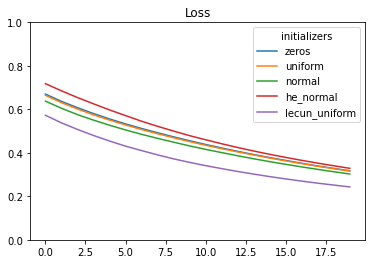

In [130]:
historydf.xs('loss', axis=1, level = 'metric').plot(ylim=(0,1))
plt.title("Loss")

Text(0.5, 0, 'Epochs')

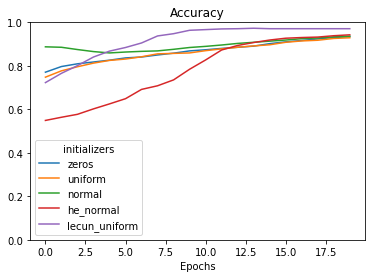

In [131]:
historydf.xs('accuracy', axis=1, level = 'metric').plot(ylim=(0,1))
plt.title("Accuracy")
plt.xlabel("Epochs")


# Inner layer representation

In [143]:
K.clear_session()
    
model = Sequential()
model.add(Dense(2, input_shape=(4,), kernel_initializer=init, activation = 'relu'))
model.add(Dense(1, input_shape=(4,), kernel_initializer=init, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),
             metrics=['accuracy'])
h = model.fit(X_train, y_train, epochs = 20, batch_size=16, verbose=1, validation_split=0.3)
dflist.append(pd.DataFrame(h.history, index=h.epoch))

Epoch 1/20
42/42 [==============================] - 0s 2ms/step - loss: 0.5568 - accuracy: 0.7902 - val_loss: 0.5108 - val_accuracy: 0.8750
Epoch 2/20
42/42 [==============================] - 0s 780us/step - loss: 0.3988 - accuracy: 0.9241 - val_loss: 0.3770 - val_accuracy: 0.9375
Epoch 3/20
42/42 [==============================] - 0s 756us/step - loss: 0.2902 - accuracy: 0.9539 - val_loss: 0.2653 - val_accuracy: 0.9653
Epoch 4/20
42/42 [==============================] - 0s 781us/step - loss: 0.2056 - accuracy: 0.9762 - val_loss: 0.1858 - val_accuracy: 0.9757
Epoch 5/20
42/42 [==============================] - 0s 732us/step - loss: 0.1509 - accuracy: 0.9717 - val_loss: 0.1345 - val_accuracy: 0.9896
Epoch 6/20
42/42 [==============================] - 0s 781us/step - loss: 0.1170 - accuracy: 0.9792 - val_loss: 0.1036 - val_accuracy: 0.9826
Epoch 7/20
42/42 [==============================] - 0s 756us/step - loss: 0.0945 - accuracy: 0.9807 - val_loss: 0.0847 - val_accuracy: 0.9826
Epoch 8/

In [144]:
result

[0.5420594215393066, 0.7233009934425354]

In [145]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [146]:
model.layers

In [147]:
inp = model.layers[0].input
out = model.layers[0].output

In [148]:
inp

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'dense_input')>

In [149]:
out

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense')>

In [150]:
features_function = K.function([inp], [out])

In [151]:
features_function

<function keras.backend.function.<locals>.func(model_inputs)>

In [152]:
features_function([X_test])[0]

array([[2.0517354 , 2.4938362 ],
       [0.7568455 , 1.2762697 ],
       [1.0116667 , 1.4269665 ],
       [2.4547076 , 3.710373  ],
       [2.1954794 , 2.770987  ],
       [2.3438294 , 2.0800343 ],
       [1.8826962 , 2.7079575 ],
       [2.740239  , 2.8167043 ],
       [2.3273816 , 2.3985806 ],
       [2.187552  , 2.939684  ],
       [0.3607788 , 0.2981974 ],
       [0.        , 0.        ],
       [2.0310488 , 2.487132  ],
       [0.        , 0.        ],
       [1.533263  , 2.4411888 ],
       [0.5018842 , 0.3817603 ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.10966909, 0.        ],
       [0.13803959, 0.30896485],
       [2.3290088 , 2.8449697 ],
       [2.2966027 , 2.6940322 ],
       [0.07057905, 0.14783156],
       [2.613673  , 3.1202602 ],
       [0.        , 0.        ],
       [2.5401697 , 2.8631878 ],
       [2.863351  , 3.294767  ],
       [0.        , 0.        ],
       [3.6368332 , 3.8558865 ],
       [3.3064404 , 3.6172137 ],
       [0.

In [153]:
features_function([X_test])[0].shape

(412, 2)

In [154]:
features = features_function([X_test])[0]

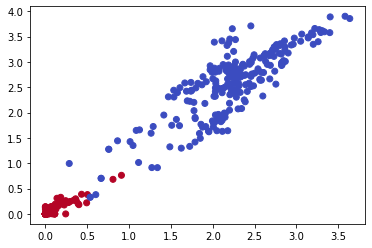

In [155]:
plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')

In [156]:
K.clear_session()
    
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation = 'relu'))
model.add(Dense(2, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),
             metrics=['accuracy'])
h = model.fit(X_train, y_train, epochs = 20, batch_size=16, verbose=1, validation_split=0.3)
dflist.append(pd.DataFrame(h.history, index=h.epoch))

Epoch 1/20
42/42 [==============================] - 0s 2ms/step - loss: 0.3261 - accuracy: 0.8512 - val_loss: 0.2321 - val_accuracy: 0.9132
Epoch 2/20
42/42 [==============================] - 0s 951us/step - loss: 0.1595 - accuracy: 0.9405 - val_loss: 0.1120 - val_accuracy: 0.9583
Epoch 3/20
42/42 [==============================] - 0s 781us/step - loss: 0.0754 - accuracy: 0.9747 - val_loss: 0.0420 - val_accuracy: 0.9931
Epoch 4/20
42/42 [==============================] - 0s 830us/step - loss: 0.0330 - accuracy: 0.9926 - val_loss: 0.0173 - val_accuracy: 0.9965
Epoch 5/20
42/42 [==============================] - 0s 906us/step - loss: 0.0146 - accuracy: 0.9985 - val_loss: 0.0090 - val_accuracy: 0.9965
Epoch 6/20
42/42 [==============================] - 0s 830us/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 7/20
42/42 [==============================] - 0s 829us/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 8/

13/13 [==============================] - 0s 667us/step - loss: 2.9188e-08 - accuracy: 1.0000


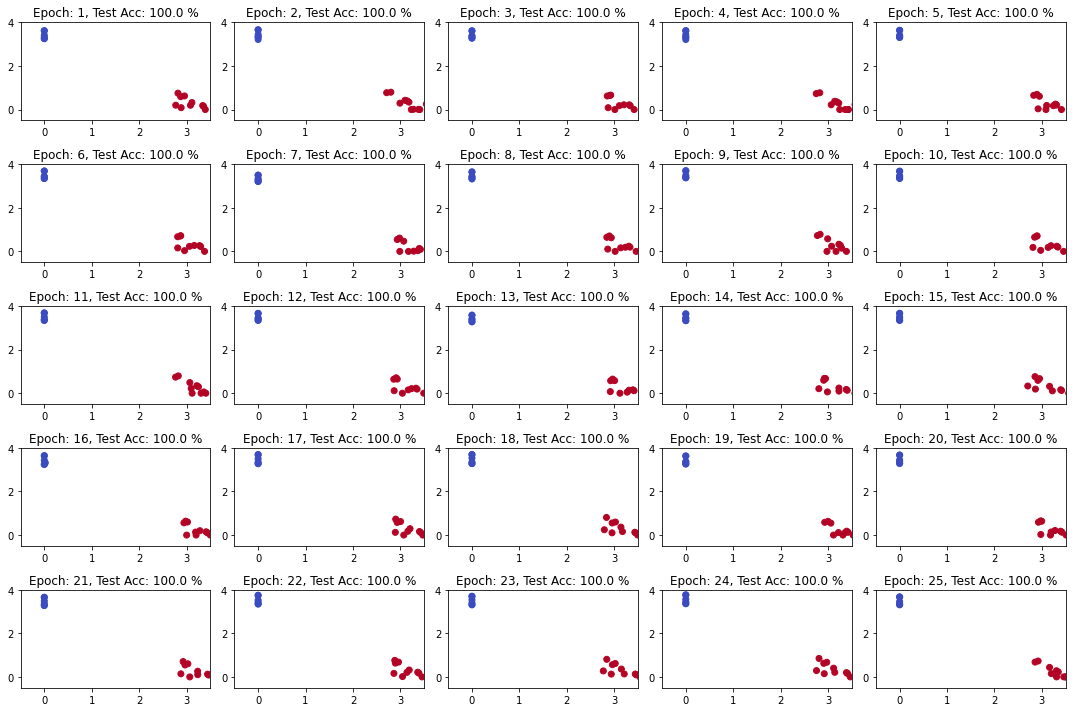

In [168]:
inp = model.layers[0].input
out = model.layers[1].output
features_function = K.function([inp], [out])
                                          
plt.figure(figsize=(15,10))
                                          
for i in range(1,26):
    plt.subplot(5,5,i)
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test)[1]
    features = features_function([X_test])[0]
    plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))
                           
plt.tight_layout()

# Exercise 1

In [169]:
wines = pd.read_csv("C:/Users/Aloke/Downloads/wines.csv")

In [170]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic_acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity_of_ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total_phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid_phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color_intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280-OD315_of_diluted_wines  178 non-null    float64
 13  Proli

In [171]:
wines.head()

Class  Alcohol  Malic_acid   Ash  Alcalinity_of_ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_intensity   Hue  OD280-OD315_of_diluted_wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

In [196]:
y=wines['Class']

In [197]:
y.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [198]:
y_cat = pd.get_dummies(y)

In [199]:
y_cat.head()

1  2  3
0  1  0  0
1  1  0  0
2  1  0  0
3  1  0  0
4  1  0  0

In [202]:
X=wines.drop('Class', axis=1)

In [203]:
X.shape

(178, 13)

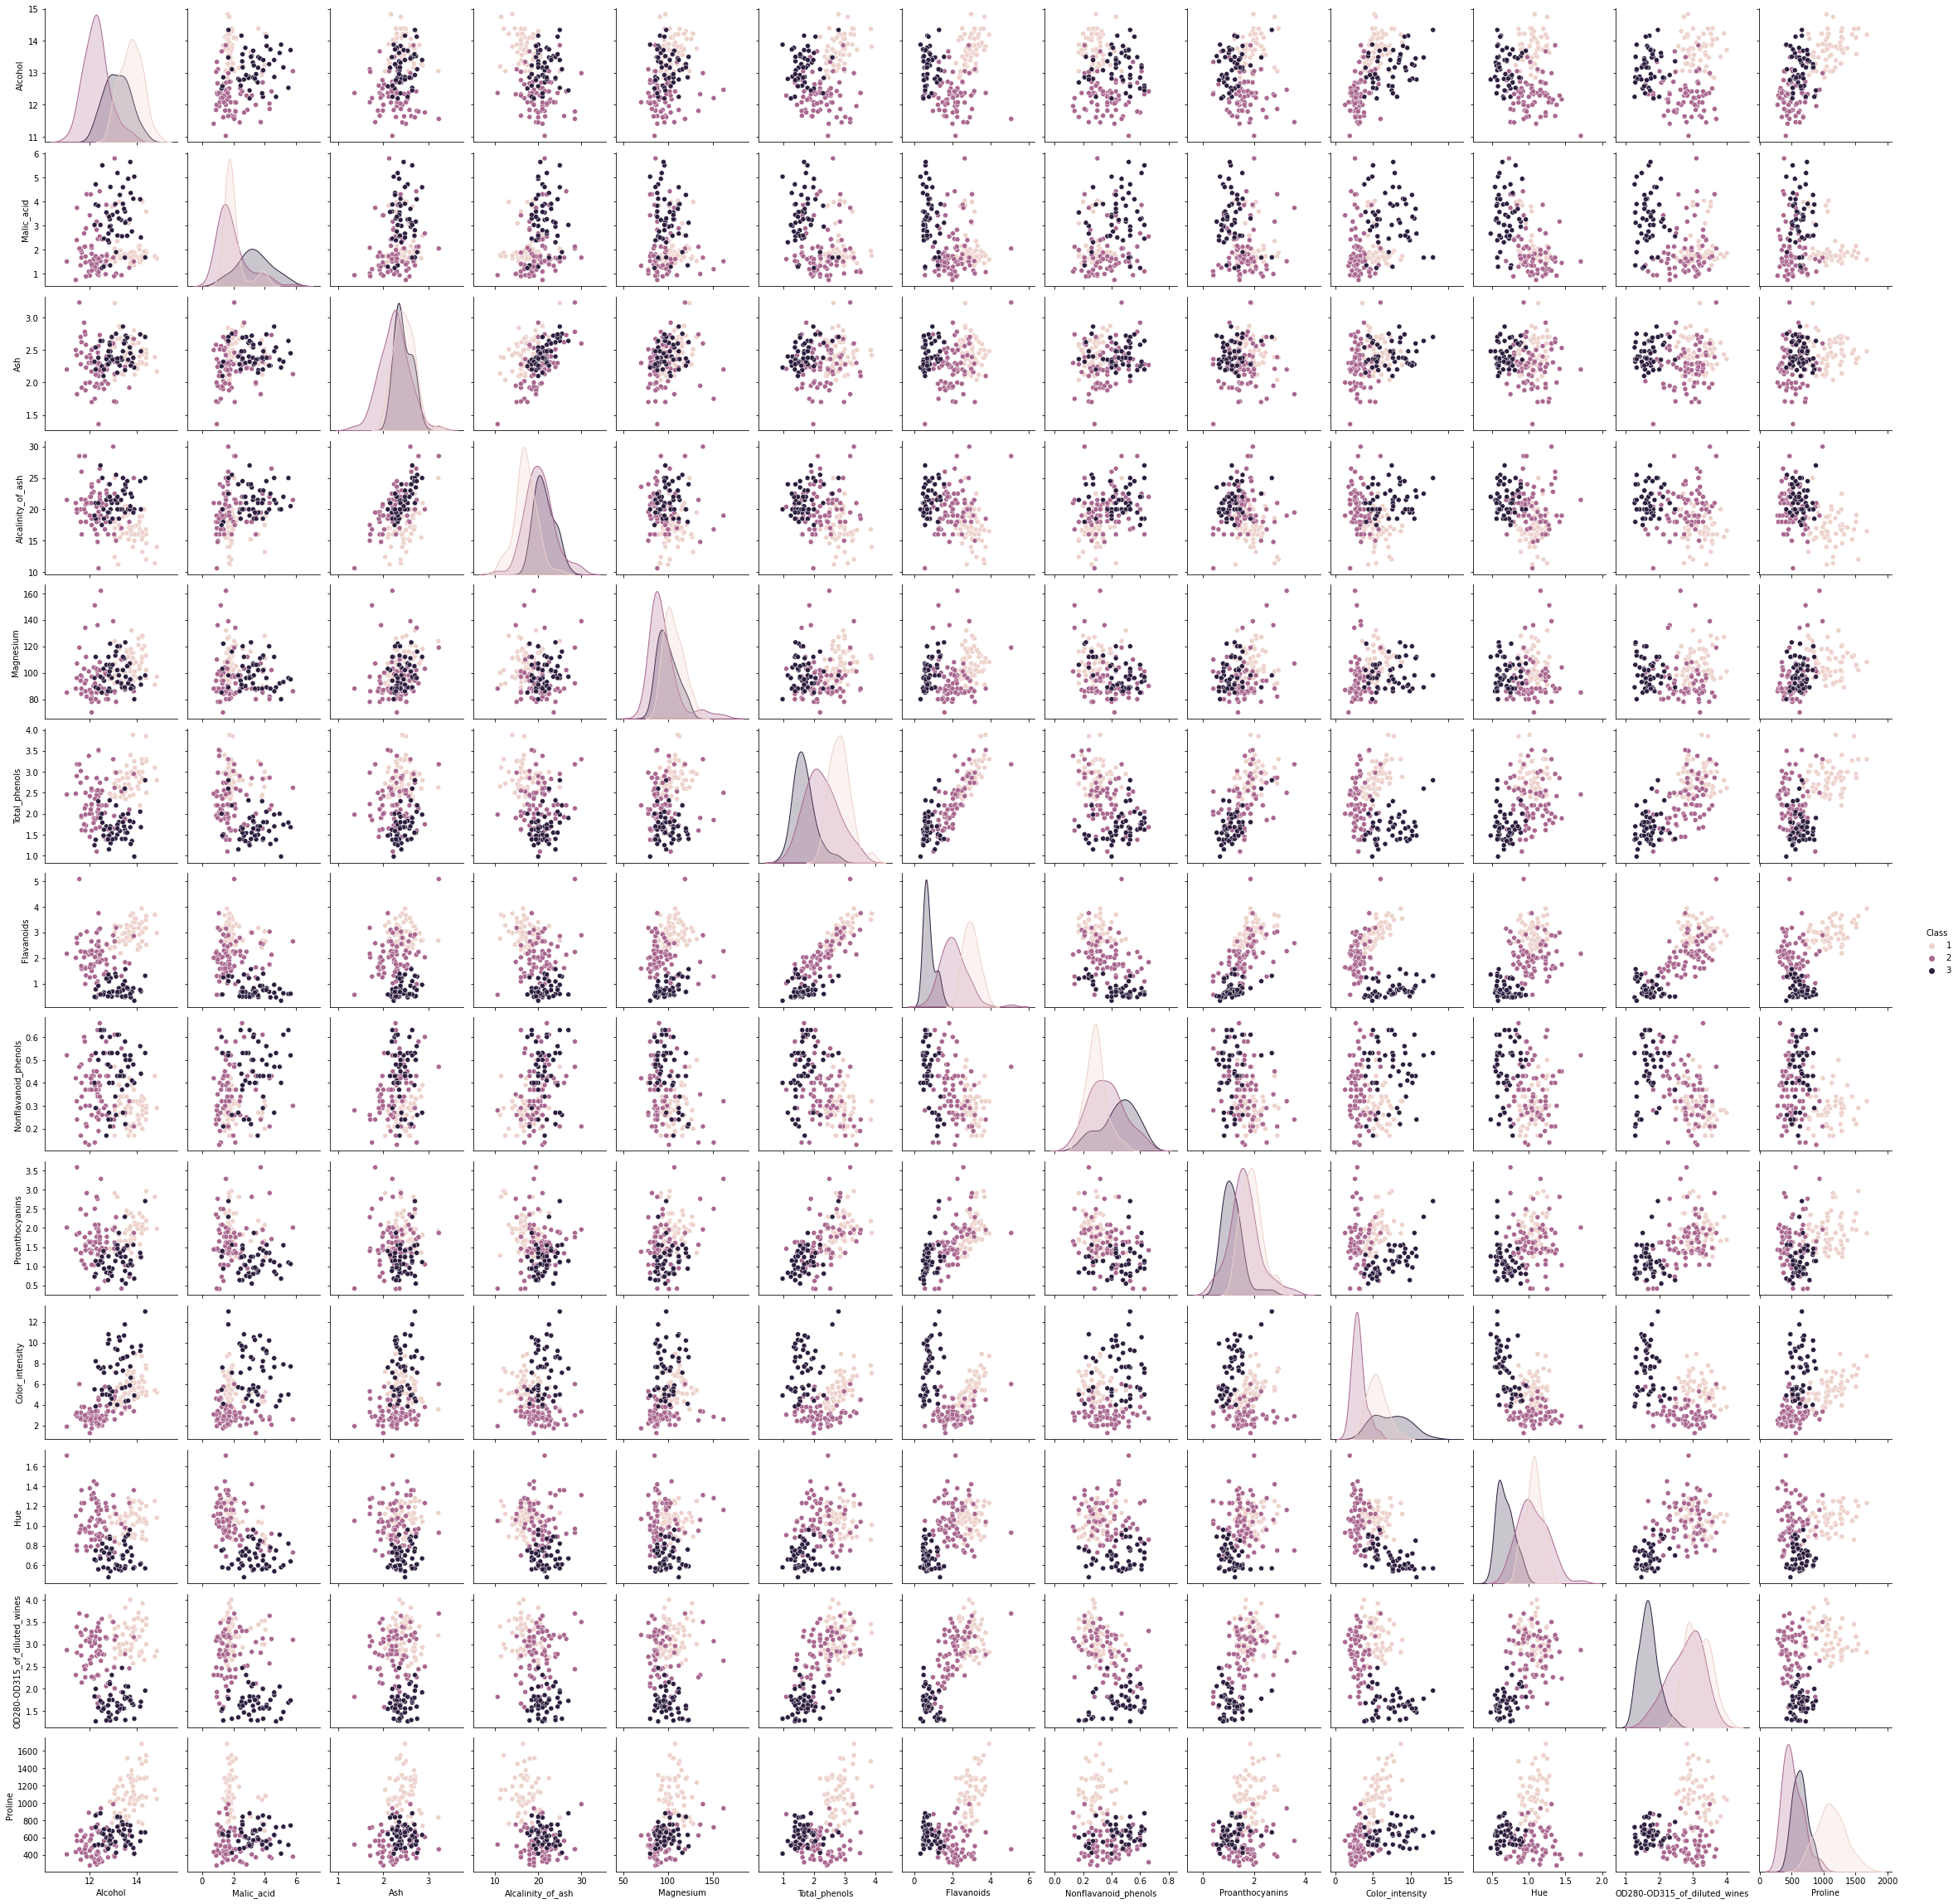

In [204]:
sns.pairplot(wines, hue='Class')

scaler = MinMaxScaler()
scaled = scaler.fit_transform(wines)
print(scaled)

In [185]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


array([[0.        , 0.84210526, 0.1916996 , ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.        , 0.57105263, 0.2055336 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.        , 0.56052632, 0.3201581 , ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [1.        , 0.58947368, 0.69960474, ..., 0.08943089, 0.10622711,
        0.39728959],
       [1.        , 0.56315789, 0.36561265, ..., 0.09756098, 0.12820513,
        0.40085592],
       [1.        , 0.81578947, 0.66403162, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [208]:
X = scale(wines.drop('Class', axis=1).values)
scaled = scaler.fit_transform(X)
scaled


array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [211]:
K.clear_session()
    
model = Sequential()
model.add(Dense(5, input_shape=(13,), kernel_initializer='he_normal', activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),
             metrics=['accuracy'])
h = model.fit(scaled, y_cat.values, epochs = 10, batch_size=8, verbose=1, validation_split=0.2)


Epoch 1/10
18/18 [==============================] - 1s 5ms/step - loss: 0.8044 - accuracy: 0.5704 - val_loss: 1.4520 - val_accuracy: 0.0278
Epoch 2/10
18/18 [==============================] - 0s 1ms/step - loss: 0.7258 - accuracy: 0.7113 - val_loss: 0.9076 - val_accuracy: 0.5833
Epoch 3/10
18/18 [==============================] - 0s 1ms/step - loss: 0.6428 - accuracy: 0.7887 - val_loss: 0.7111 - val_accuracy: 0.9167
Epoch 4/10
18/18 [==============================] - 0s 1ms/step - loss: 0.5639 - accuracy: 0.8380 - val_loss: 0.7358 - val_accuracy: 0.6389
Epoch 5/10
18/18 [==============================] - 0s 1ms/step - loss: 0.4868 - accuracy: 0.8662 - val_loss: 0.6077 - val_accuracy: 0.8611
Epoch 6/10
18/18 [==============================] - 0s 1ms/step - loss: 0.4332 - accuracy: 0.8451 - val_loss: 0.6664 - val_accuracy: 0.8056
Epoch 7/10
18/18 [==============================] - 0s 1ms/step - loss: 0.3824 - accuracy: 0.8662 - val_loss: 0.4956 - val_accuracy: 0.9444
Epoch 8/10
18/18 [==

# Exercise 2

In [260]:
K.clear_session()
    
model = Sequential()
model.add(Dense(8, input_shape=(13,), kernel_initializer='he_normal', activation = 'tanh'))
model.add(Dense(5, kernel_initializer='he_normal', activation = 'tanh'))
model.add(Dense(2, kernel_initializer='he_normal', activation = 'tanh'))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.05),
             metrics=['accuracy'])
h = model.fit(scaled, y_cat.values, epochs = 20, batch_size=16, verbose=1, validation_split=0.2)

Epoch 1/20
9/9 [==============================] - 0s 12ms/step - loss: 0.9972 - accuracy: 0.4366 - val_loss: 2.1268 - val_accuracy: 0.0000e+00
Epoch 2/20
9/9 [==============================] - 0s 3ms/step - loss: 0.8374 - accuracy: 0.6549 - val_loss: 1.9744 - val_accuracy: 0.0000e+00
Epoch 3/20
9/9 [==============================] - 0s 3ms/step - loss: 0.5854 - accuracy: 0.7887 - val_loss: 1.2811 - val_accuracy: 0.0000e+00
Epoch 4/20
9/9 [==============================] - 0s 2ms/step - loss: 0.5268 - accuracy: 0.7958 - val_loss: 0.7813 - val_accuracy: 0.8056
Epoch 5/20
9/9 [==============================] - 0s 3ms/step - loss: 0.3314 - accuracy: 0.8803 - val_loss: 0.6452 - val_accuracy: 0.8611
Epoch 6/20
9/9 [==============================] - 0s 3ms/step - loss: 0.2914 - accuracy: 0.9085 - val_loss: 0.3740 - val_accuracy: 1.0000
Epoch 7/20
9/9 [==============================] - 0s 3ms/step - loss: 0.3655 - accuracy: 0.8451 - val_loss: 0.4327 - val_accuracy: 0.9722
Epoch 8/20
9/9 [=====

In [261]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 112       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 9         
Total params: 178
Trainable params: 178
Non-trainable params: 0
_________________________________________________________________


In [262]:
inp = model.layers[0].input
out = model.layers[1].output

In [263]:
features_function = K.function([inp], [out])

In [264]:
features = features_function([scaled])[0]

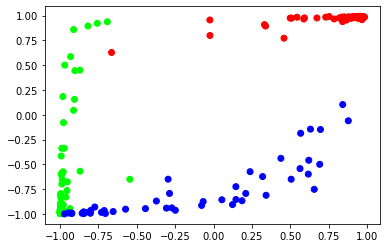

In [265]:
plt.scatter(features[:, 0], features[:, 1], c=y_cat)

# Exercise 3

In [296]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

input_layer = Input(shape=(13,))
Layer_1 = Dense(8, kernel_initializer='he_normal', activation="relu")(input_layer)
Layer_2 = Dense(5, kernel_initializer='he_normal', activation="tanh")(Layer_1)
Layer_3 = Dense(2, kernel_initializer='he_normal', activation="tanh")(Layer_2)
output_layer = Dense(3, activation = "softmax")(Layer_3)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(scaled, y_cat.values, epochs=50, batch_size=16, verbose=1)

Epoch 1/50
12/12 [==============================] - 0s 546us/step - loss: 1.2748 - accuracy: 0.2697
Epoch 2/50
12/12 [==============================] - 0s 545us/step - loss: 1.2400 - accuracy: 0.2697
Epoch 3/50
12/12 [==============================] - 0s 636us/step - loss: 1.2042 - accuracy: 0.2753
Epoch 4/50
12/12 [==============================] - 0s 454us/step - loss: 1.1708 - accuracy: 0.4157
Epoch 5/50
12/12 [==============================] - 0s 676us/step - loss: 1.1314 - accuracy: 0.4831
Epoch 6/50
12/12 [==============================] - 0s 637us/step - loss: 1.0854 - accuracy: 0.4831
Epoch 7/50
12/12 [==============================] - 0s 507us/step - loss: 1.0417 - accuracy: 0.4888
Epoch 8/50
12/12 [==============================] - 0s 546us/step - loss: 1.0063 - accuracy: 0.5393
Epoch 9/50
12/12 [==============================] - 0s 765us/step - loss: 0.9848 - accuracy: 0.5955
Epoch 10/50
12/12 [==============================] - 0s 644us/step - loss: 0.9660 - accuracy: 0.6854

In [297]:
features_function = K.function([input_layer], [Layer_2])

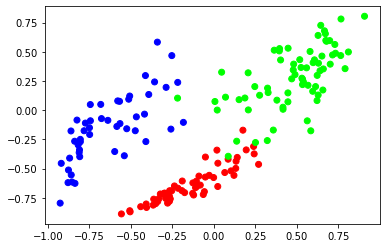

In [298]:
features = features_function([scaled])[0]
plt.scatter(features[:,0], features[:,1], c=y_cat)

# Exercise 4

In [301]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

In [302]:
checkpointer=ModelCheckpoint(filepath="/tmp/weights.hdf5", verbose = 1, save_best_only=True)

In [304]:
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=1, verbose=1, mode='auto')

In [305]:
tensorboard = TensorBoard(log_dir='/tmp/tensorboard')

In [307]:
from sklearn.model_selection import train_test_split

In [308]:
X_train, X_test, y_train, y_test = train_test_split(scaled, y_cat.values, test_size=0.3, random_state=42 )

In [309]:
model.fit(X_train, y_train, batch_size=32, epochs=20, verbose=2, validation_data=(X_test, y_test), callbacks=[checkpointer, earlystopper, tensorboard])

Epoch 1/20
4/4 - 0s - loss: 0.4080 - accuracy: 0.9677 - val_loss: 0.3997 - val_accuracy: 0.9259

Epoch 00001: val_loss improved from inf to 0.39974, saving model to /tmp\weights.hdf5
Epoch 2/20
4/4 - 0s - loss: 0.4045 - accuracy: 0.9597 - val_loss: 0.3943 - val_accuracy: 0.9444

Epoch 00002: val_loss improved from 0.39974 to 0.39427, saving model to /tmp\weights.hdf5
Epoch 3/20
4/4 - 0s - loss: 0.4017 - accuracy: 0.9516 - val_loss: 0.3909 - val_accuracy: 0.9444

Epoch 00003: val_loss improved from 0.39427 to 0.39085, saving model to /tmp\weights.hdf5
Epoch 4/20
4/4 - 0s - loss: 0.3980 - accuracy: 0.9516 - val_loss: 0.3891 - val_accuracy: 0.9444

Epoch 00004: val_loss improved from 0.39085 to 0.38911, saving model to /tmp\weights.hdf5
Epoch 5/20
4/4 - 0s - loss: 0.3935 - accuracy: 0.9597 - val_loss: 0.3882 - val_accuracy: 0.9259

Epoch 00005: val_loss improved from 0.38911 to 0.38819, saving model to /tmp\weights.hdf5
Epoch 6/20
4/4 - 0s - loss: 0.3893 - accuracy: 0.9597 - val_loss: 0.3